## Group Name: Strictly PJ McGovern II
<b>Group Members <b>  
* Nana Badu Ameyaw  
* Cedric Parker-Allotey  
* Stefan Ameyaw Mills  
* Joel Akrowey Kaku

## SPJ Savings and Loans

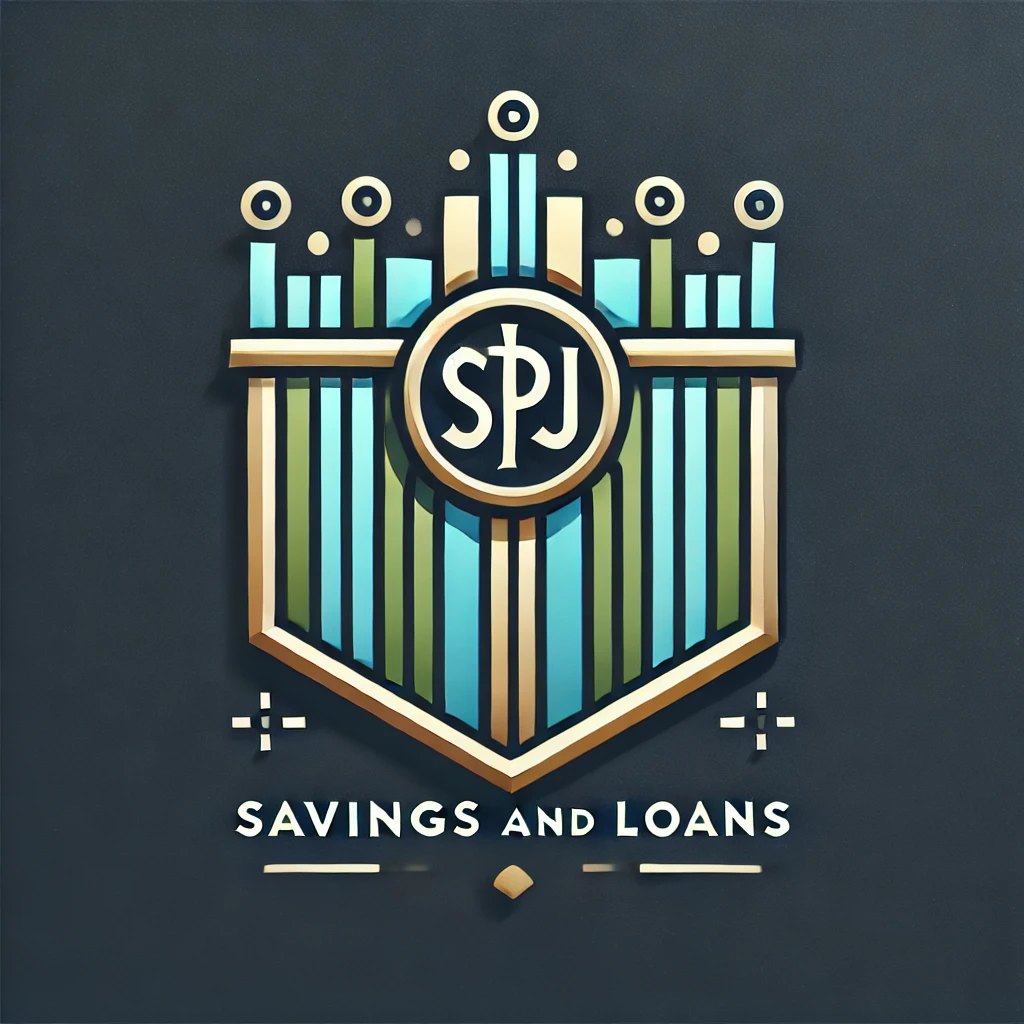

<b>SPJ Savings and Loans Company</b> is a renowned financial institution committed to empowering women and youth. As part of its dedication to achieving United Nations Sustainable Development Goals (SDGs)—notably <b>SDG 1</b> (No Poverty), <b>SDG 5</b> (Gender Equality), and <b>SDG 8</b> (Decent Work and Economic Growth)—the company aims to support entrepreneurship by providing accessible loan disbursement options.

The code below demonstrates how previous loan request data can be leveraged to predict whether an individual is likely to default on their loan. This predictive model has been trained using the RandomForest algorithm, delivering high accuracy in forecasting loan default risks and guiding decisions on loan approvals.

<b>SPJ Savings and Loans — _Build your future with us_.</b>

## Importing libraries

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading and previewing data

In [42]:
credit_card_data=pd.read_csv('credit_risk.csv')
dataset=credit_card_data.copy()

In [43]:
print(f'Dataset shape: {dataset.shape}')
dataset

Dataset shape: (32581, 12)


,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


## 3. Statistical summaries

In [44]:
#Statistical Data Analysis
dataset.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


* Checking the Min and Max ranges it can be seen that there are variation (e.g. Age,Income,Emp_length etc) suggesting the presence of extreme values.

## 4. Exploratory Data Analysis

In [45]:
#Checking the number of missing values for each column
dataset.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [46]:
#Dealing with Missing Values
median_emp_length = dataset['Emp_length'].median()
dataset['Emp_length'].fillna(median_emp_length, inplace=True)

median_rate = dataset['Rate'].median()
dataset['Rate'].fillna(median_rate, inplace=True)

print(f'New missing value count are as follows:\n{dataset.isnull().sum()}')


New missing value count are as follows:
Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


C:\Users\stefan.mills\AppData\Local\Temp\ipykernel_21728\1759913197.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Emp_length'].fillna(median_emp_length, inplace=True)
C:\Users\stefan.mills\AppData\Local\Temp\ipykernel_21728\1759913197.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

## 5 Outlier cases where the Emp_length is greater than Age

In [47]:
dataset['age_emp_length_check']=dataset['Emp_length'] > dataset['Age']
filtered_dataset = dataset[dataset['age_emp_length_check']]
filtered_dataset

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,age_emp_length_check
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3,True
210,210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,0,0.10,N,4,True


In [48]:
# Replace invalid Emp_length values with NaN
dataset.loc[dataset['Emp_length'] > dataset['Age'], 'Emp_length'] = np.nan
dataset.isnull().sum()


Id                      0
Age                     0
Income                  0
Home                    0
Emp_length              2
Intent                  0
Amount                  0
Rate                    0
Status                  0
Percent_income          0
Default                 0
Cred_length             0
age_emp_length_check    0
dtype: int64

In [49]:
#Replacing NaN with median
median_emp_length = dataset['Emp_length'].median()
dataset['Emp_length'].fillna(median_emp_length, inplace=True)
dataset.isnull().sum()

C:\Users\stefan.mills\AppData\Local\Temp\ipykernel_21728\2731563532.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Emp_length'].fillna(median_emp_length, inplace=True)


Id                      0
Age                     0
Income                  0
Home                    0
Emp_length              0
Intent                  0
Amount                  0
Rate                    0
Status                  0
Percent_income          0
Default                 0
Cred_length             0
age_emp_length_check    0
dtype: int64

## Label Encoding Default Column

In [50]:
dataset['Default'] = dataset['Default'].map({'Y': 1, 'N': 0})
dataset

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,age_emp_length_check
0,0,22,59000,RENT,4.0,PERSONAL,35000,16.02,1,0.59,1,3,True
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,0,2,False
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,0,3,False
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,0,2,False
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,1,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,0,30,False
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,0,19,False
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,0,28,False
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,0,26,False


## Visualizations

In [51]:
#Creating a copy of the dataset for visualizations
vizdata = dataset.copy()

**Before we visualize our data, it is prudent to define what 1 and 0 mean in the "Status" column. To do this, we we would do a count of the 1s and 0s. The lesser number will then be named the defaulted loans and the greater number, the paid loans. This is based on the assumption that it is not possible for a financial institution to allow the majority of its customers default their loans. They would be audited and will eventually close out**

In [52]:
# Count the number of 1s and 0s
count_1s = (vizdata['Status'] == 1).sum()
count_0s = (vizdata['Status'] == 0).sum()

print(f"Count of 1s: {count_1s}")
print(f"Count of 0s: {count_0s}")

Count of 1s: 7108
Count of 0s: 25473


**Based on this information, it is safe to conclude that the 0s will be named the paid loans and the 1s would be named the defaulted loans**

### 1. Previous Defaults vs Current Loan Default  
This stacked bar chart shows how borrowers who previously defaulted (Default = Y) perform on their current loans (Status = Fully Paid, Charged Off, Current). It helps identify whether a history of defaults makes it more likely for the current loan to also default (Charged Off).

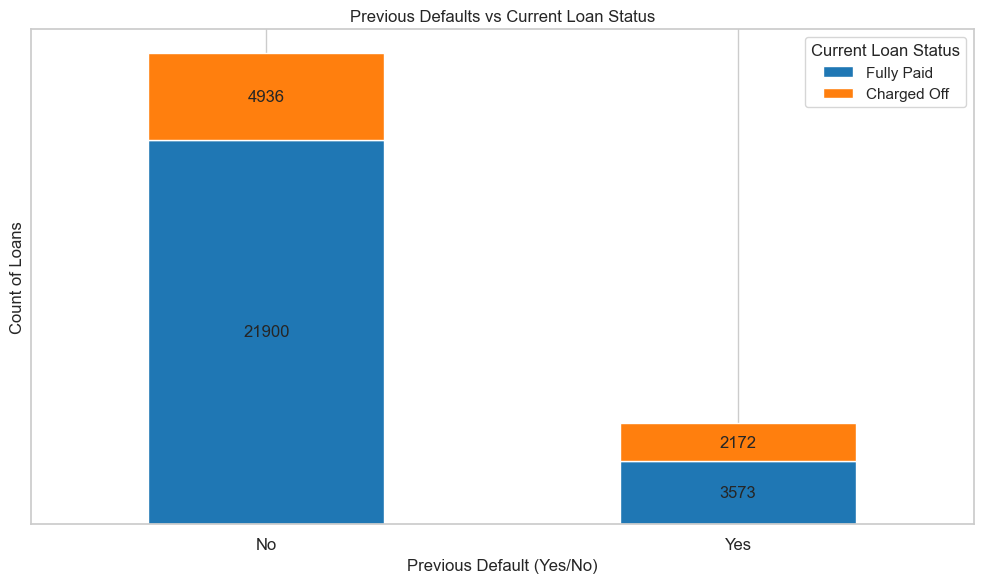

In [53]:
# Creating the crosstab data
crosstab_data = pd.crosstab(vizdata['Default'], vizdata['Status'])

# Plotting the stacked bar chart
ax = crosstab_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Adding labels and title
plt.title('Previous Defaults vs Current Loan Status')
plt.xlabel('Previous Default (Yes/No)')
plt.ylabel('Count of Loans')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0, fontsize=12)
plt.legend(title='Current Loan Status', labels=['Fully Paid', 'Charged Off'], loc='upper right')

# Removing the y-axis values (ticks and labels)
plt.yticks([])

# Adding data labels on top of each bar
for p in ax.patches:
    width = p.get_width()  # Bar width
    height = p.get_height()  # Bar height
    x, y = p.get_xy()  # Bar starting point
    if height > 0:  # Only label bars with height greater than 0
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

# Saving the plot as an image
plt.savefig('Previous Defaults vs Current Loan Default.jpg')

# Showing the plot
plt.tight_layout()
plt.show()


### 2.  Loan Default by Home Ownership  
May give insights into whether default rates differ based on home ownership status.

<Figure size 1000x600 with 0 Axes>

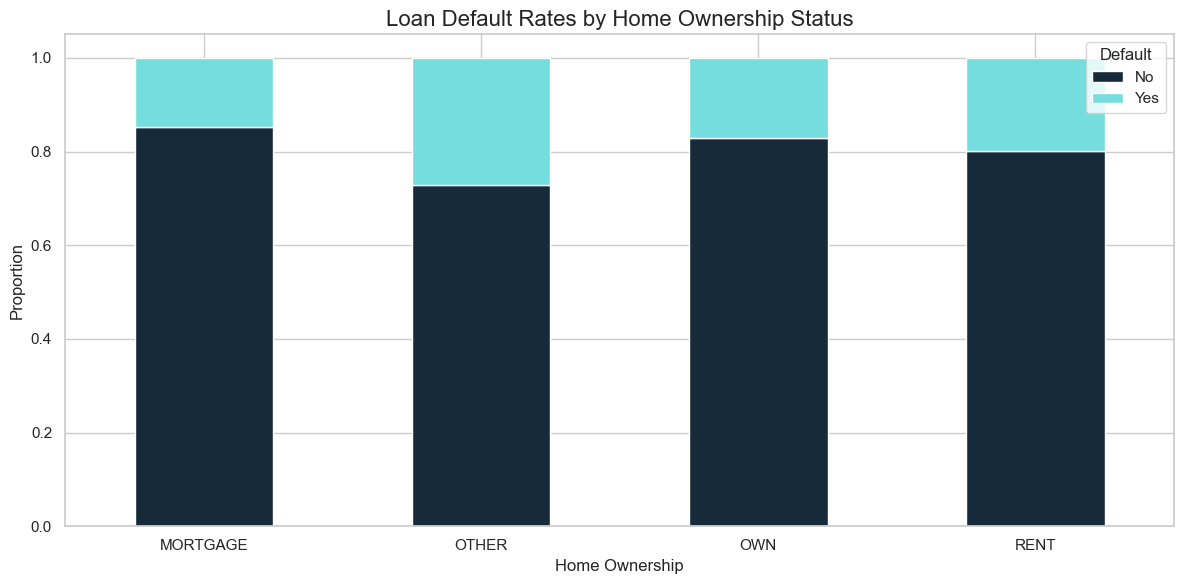

In [54]:
#Grouping the data by 'Home' and 'Default', then count occurrences
home_default_counts = dataset.groupby(['Home', 'Default']).size().unstack()

#Creating proportions (normalize the counts by row)
home_default_proportions = home_default_counts.div(home_default_counts.sum(axis=1), axis=0)

#Setting up the plot
plt.figure(figsize=(10, 6))
home_default_proportions.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#172A3A','#75DDDD'])

#Adding labels and title
plt.title('Loan Default Rates by Home Ownership Status', fontsize=16)
plt.xlabel('Home Ownership', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=0)

#Adding a legend
plt.legend(title='Default', labels=['No', 'Yes'], loc='upper right')

# Saving the plot as an image
plt.savefig('Loan Default by Home Ownership.jpg')

#Showing the plot
plt.tight_layout()
plt.show()


### 3. Income Distribution for Borrowers with Previous Defaults  
We want to explore if borrowers who have defaulted previously tend to have lower incomes compared to those who haven’t.  
This boxplot shows the income distribution of borrowers who have defaulted before vs those who haven’t.
The visualization helps answer whether lower-income borrowers are more likely to have a history of defaulting on loans.

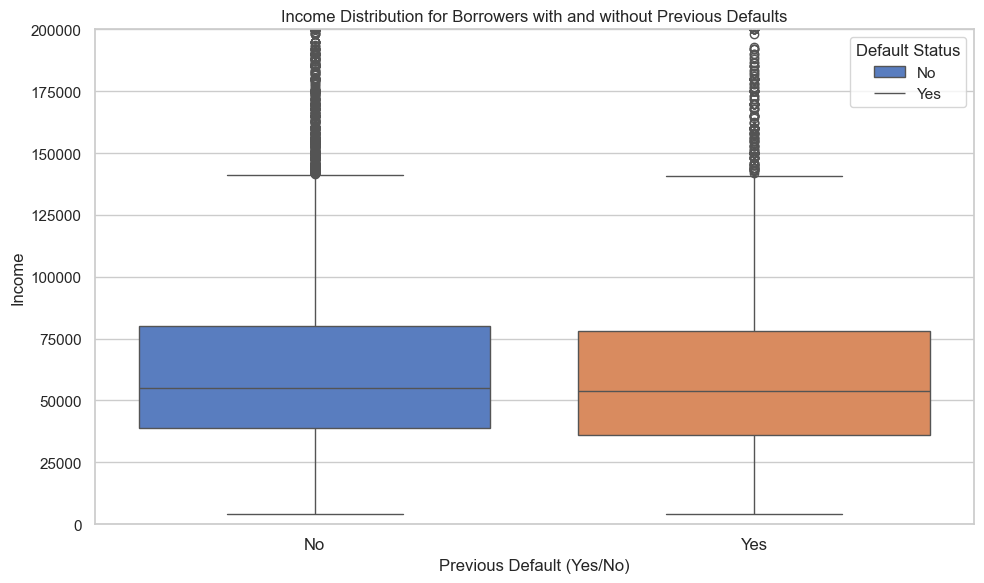

In [55]:
# Boxplot for income distribution based on previous default history
plt.figure(figsize=(10, 6))
sns.boxplot(x='Default', y='Income', hue='Default', data=vizdata, palette='muted')

# Adding labels and title
plt.title('Income Distribution for Borrowers with and without Previous Defaults')
plt.xlabel('Previous Default (Yes/No)')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0, fontsize=12)
plt.ylabel('Income')
plt.legend(title='Default Status', labels=['No', 'Yes'], loc='upper right')

# Adjusting the y-axis scale
plt.ylim(0, 200000)

# Saving the plot as an image
plt.savefig('Income Distribution for Borrowers with Previous Defaults.jpg')

# Showing the plot
plt.tight_layout()
plt.show()


### 4. Loan Amount Distribution by Home Ownership Status  
This boxplot would allow us to compare the typical loan amounts requested by people in different home ownership categories, helping you see if homeowners request larger loans than renters.

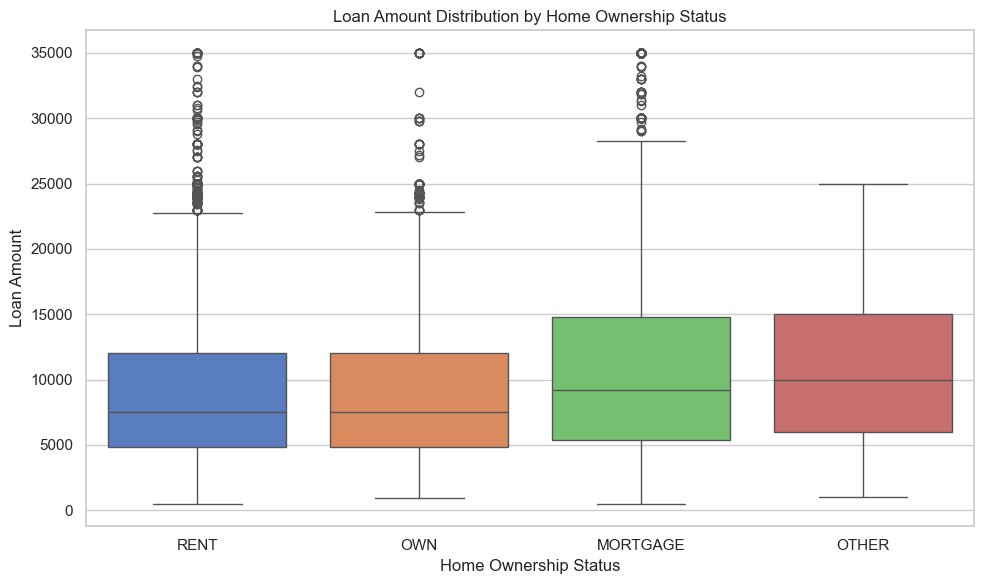

In [56]:
#Setting the style for the plot
sns.set(style="whitegrid")

#Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Home', y='Amount', hue='Home', data=dataset, palette='muted')

#Adding labels and title
plt.title('Loan Amount Distribution by Home Ownership Status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Loan Amount')

# Saving the plot as an image
plt.savefig('Loan Amount Distribution by Home Ownership Status.jpg')

#Showing the plot
plt.tight_layout()
plt.show()

### 5. Default Rates by Loan Purpose (Intent)  
This bar plot would show the proportion of loans that defaulted for each loan purpose. It will help identify whether certain loan types are more risky.

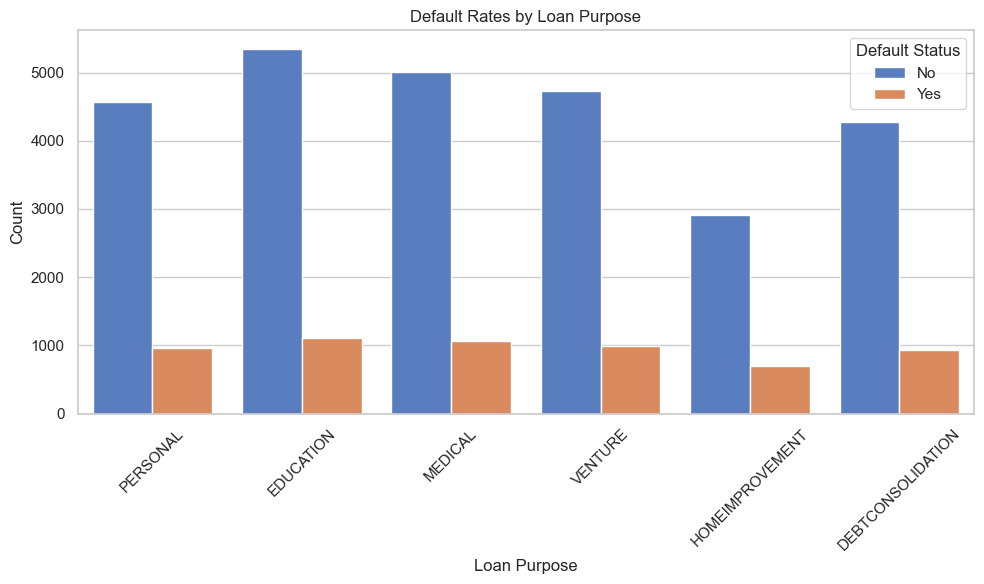

In [57]:
#Setting the style for the plot
sns.set(style="whitegrid")

#Creating the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Intent', hue='Default', data=dataset, palette='muted')

#Adding labels and title
plt.title('Default Rates by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default Status', labels=['No', 'Yes'], loc='upper right')

# Saving the plot as an image
plt.savefig('Default Rates by Loan Purpose (Intent).jpg')

#Showing the plot
plt.tight_layout()
plt.show()


### 6. Loan Amount vs Default History  
The violin plot visualizes the distribution of loan amounts for borrowers based on whether they’ve previously defaulted or not.
This helps to identify if borrowers with previous defaults tend to apply for smaller or larger loans.


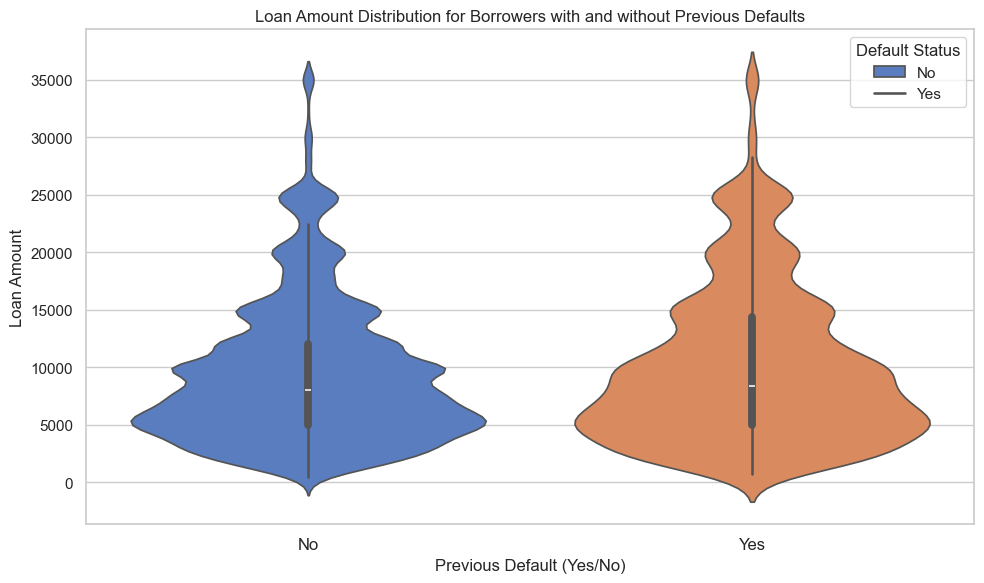

In [58]:
#Creating the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Default', y='Amount', hue='Default', data=vizdata, palette='muted')

#Adding labels and title 
plt.title('Loan Amount Distribution for Borrowers with and without Previous Defaults')
plt.xlabel('Previous Default (Yes/No)')
plt.ylabel('Loan Amount')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0, fontsize=12)
plt.legend(title='Default Status', labels=['No', 'Yes'], loc='upper right')

# Saving the plot as an image
plt.savefig('Loan Amount vs Default History.jpg')

#Showing the plot
plt.tight_layout()
plt.show()


### 7. Interest Rate vs Current Loan Status  
This boxplot shows the distribution of interest rates across the different loan statuses (Fully Paid, Charged Off, and Current).
It helps to determine if higher interest rates are correlated with a higher risk of loans being charged off.

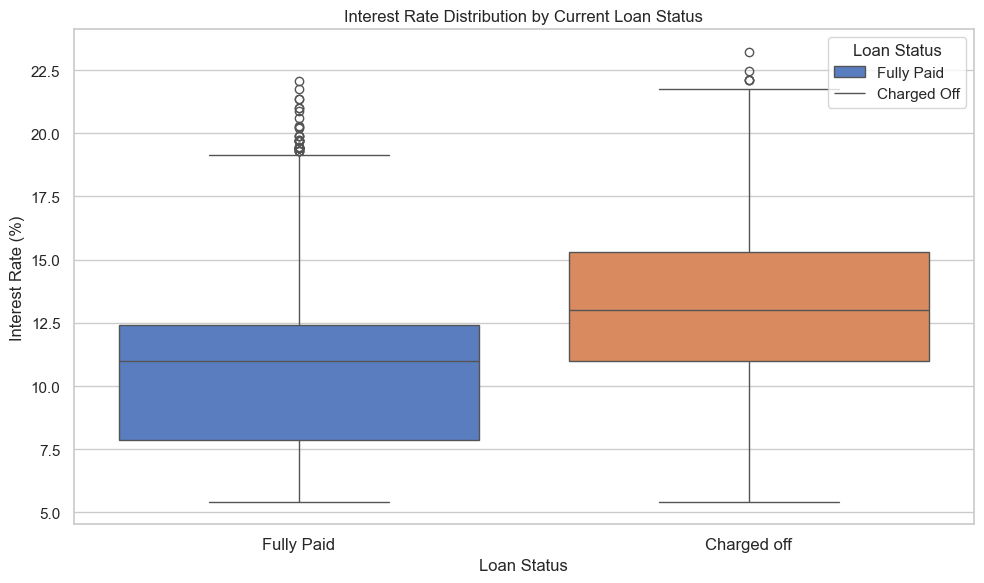

In [59]:
#Creating the boxplot plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Rate', hue='Status', data=vizdata, palette='muted')

#Adding labels and title
plt.title('Interest Rate Distribution by Current Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.xticks([0, 1], ['Fully Paid', 'Charged off'], rotation=0, fontsize=12)
plt.legend(title='Loan Status', labels=['Fully Paid', 'Charged Off'], loc='upper right')

# Saving the plot as an image
plt.savefig('Interest Rate vs Current Loan Status.jpg')

#Showing the plot
plt.tight_layout()
plt.show()


### 8. Interest Rate by Loan Purpose  
This boxplot will compare the interest rates across various loan purposes, highlighting whether specific loan types tend to have higher or lower rates.

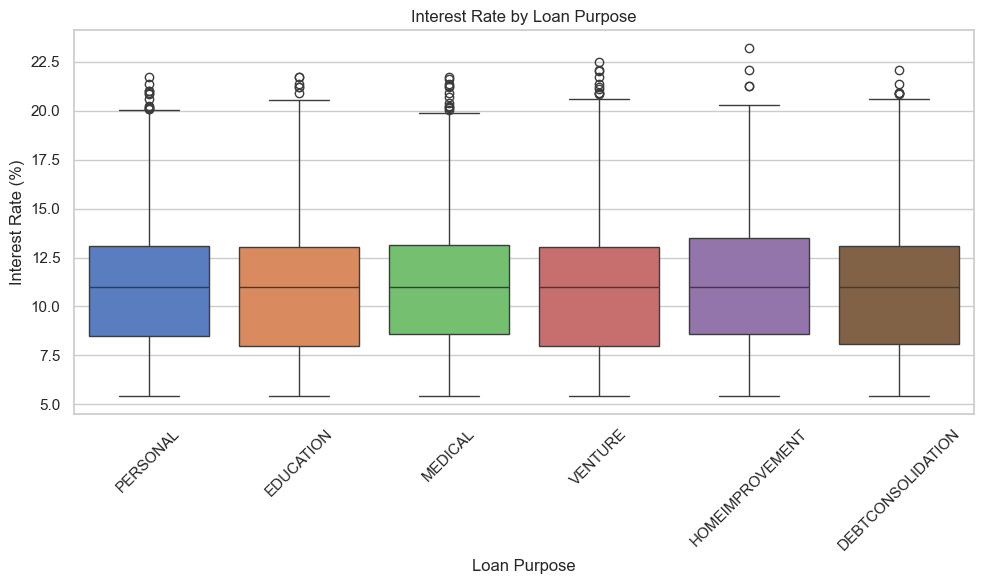

In [60]:
#Creating the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Intent', y='Rate', data=dataset, hue='Intent', palette='muted')

#Adding labels and title
plt.title('Interest Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=45)

# Saving the plot as an image
plt.savefig('Interest Rate by Loan Purpose.jpg')

#Showing the plot
plt.tight_layout()
plt.show()


## Applying One Hot Encoding to Other columns with more than one category

* All each category will form a unique column which will be populated with 0 True/ False (1,0)
* For each category that has been onehot encoded, one of the categories will be dropped to prevent the <b> Dummy Variable Trap </b>
* Multiple columns will be generated

In [61]:
dataset = pd.get_dummies(dataset, columns=['Home', 'Intent'], drop_first=True)
dataset

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,age_emp_length_check,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,22,59000,4.0,35000,16.02,1,0.59,1,3,True,False,False,True,False,False,False,True,False
1,1,21,9600,5.0,1000,11.14,0,0.10,0,2,False,False,True,False,True,False,False,False,False
2,2,25,9600,1.0,5500,12.87,1,0.57,0,3,False,False,False,False,False,False,True,False,False
3,3,23,65500,4.0,35000,15.23,1,0.53,0,2,False,False,False,True,False,False,True,False,False
4,4,24,54400,8.0,35000,14.27,1,0.55,1,4,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,1.0,5800,13.16,0,0.11,0,30,False,False,False,False,False,False,False,True,False
32577,32577,54,120000,4.0,17625,7.49,0,0.15,0,19,False,False,False,False,False,False,False,True,False
32578,32578,65,76000,3.0,35000,10.99,1,0.46,0,28,False,False,False,True,False,True,False,False,False
32579,32579,56,150000,5.0,15000,11.48,0,0.10,0,26,False,False,False,False,False,False,False,True,False


## Seperating the Dependent and Independent Variables

In [62]:

X = dataset.drop(['Status','Id','age_emp_length_check'], axis=1) # All columns except Status, Id,age_emp_length_check
y = dataset['Status'] # Target Variable

X

,Age,Income,Emp_length,Amount,Rate,Percent_income,Default,Cred_length,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,22,59000,4.0,35000,16.02,0.59,1,3,False,False,True,False,False,False,True,False
1,21,9600,5.0,1000,11.14,0.10,0,2,False,True,False,True,False,False,False,False
2,25,9600,1.0,5500,12.87,0.57,0,3,False,False,False,False,False,True,False,False
3,23,65500,4.0,35000,15.23,0.53,0,2,False,False,True,False,False,True,False,False
4,24,54400,8.0,35000,14.27,0.55,1,4,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,0,30,False,False,False,False,False,False,True,False
32577,54,120000,4.0,17625,7.49,0.15,0,19,False,False,False,False,False,False,True,False
32578,65,76000,3.0,35000,10.99,0.46,0,28,False,False,True,False,True,False,False,False
32579,56,150000,5.0,15000,11.48,0.10,0,26,False,False,False,False,False,False,True,False


## Target Variable Distribution to see balance

<b>  Rejection =0  
Acceptance=1
<b>

In [63]:
y.value_counts()

Status
0    25473
1     7108
Name: count, dtype: int64

<b>Only 17.6% of the loans in the dataset were approved (Status = 1), indicating a high rejection rate.<b>

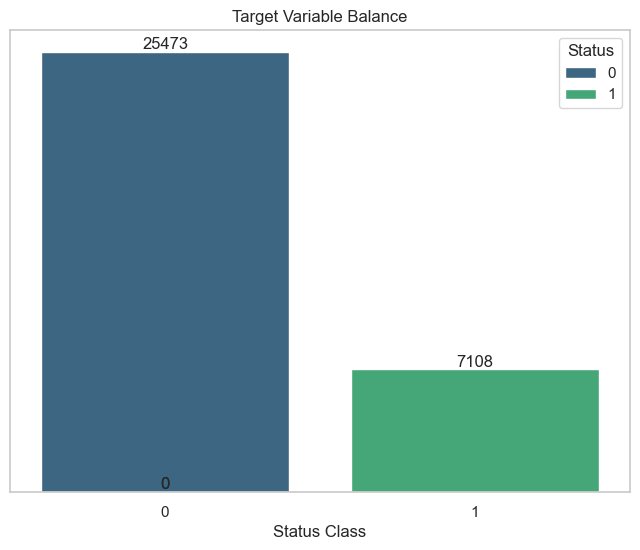

In [64]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Status', hue='Status', data=dataset, palette='viridis')
plt.title('Target Variable Balance')
plt.xlabel('Status Class')
plt.ylabel('Count')

# Add labels on top of the bars without decimals
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Remove y-axis values
ax.yaxis.set_visible(False)

plt.grid(False)  # Remove gridlines
plt.show()

<b> A dataset with a significant class imbalance (such as only 21.8% approved loans) can indeed affect model performance, particularly for classification models. This imbalance may lead the model to be biased towards the majority class (in this case, likely predicting more rejections), which may yield high accuracy but poor predictive power for the minority class.<b>

## Building Predictive Model

In [65]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
#Displaying the first 5 rows of the Training Dataset
X_train.head()

,Age,Income,Emp_length,Amount,Rate,Percent_income,Default,Cred_length,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
32377,64,46000,2.0,4800,11.09,0.10,1,24,False,False,True,False,False,False,True,False
1338,26,26000,0.0,8500,16.45,0.33,0,3,False,True,False,False,False,False,False,False
7047,23,51000,3.0,16000,13.11,0.31,1,3,False,False,False,False,False,False,True,False
8225,22,56004,6.0,6000,7.88,0.11,0,4,False,False,False,False,False,True,False,False
7178,24,79000,3.0,7000,12.54,0.09,0,3,False,False,True,False,False,False,True,False


In [67]:
#Displaying the first 5 rows of the Training Dataset
X_test.head()

,Age,Income,Emp_length,Amount,Rate,Percent_income,Default,Cred_length,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
14668,24,28000,6.0,10000,10.37,0.36,0,2,False,True,False,False,True,False,False,False
24614,27,64000,0.0,10000,15.27,0.16,1,10,False,False,True,False,False,False,True,False
11096,26,72000,10.0,16000,10.99,0.22,0,3,False,False,False,True,False,False,False,False
10424,23,27996,7.0,10000,10.99,0.36,0,2,False,False,True,False,False,False,False,False
26007,30,44500,2.0,13000,16.32,0.29,0,6,False,False,True,False,False,True,False,False


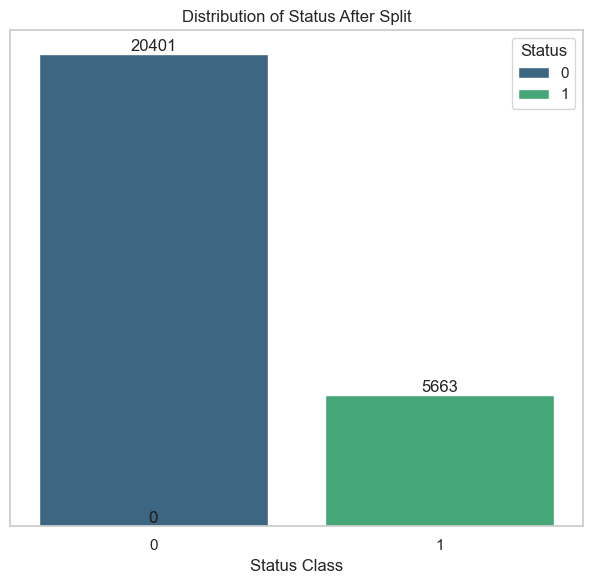

In [68]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Two plots side by side

# Create the count plot for y_train
ax = sns.countplot(x=y_train, hue=y_train, palette='viridis')
plt.title('Distribution of Status After Split')
plt.xlabel('Status Class')
plt.ylabel('Count')

# Add labels on top of the bars without decimals
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Remove y-axis values
ax.yaxis.set_visible(False)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

## Scaling Data to have a uniform range for each feature to Avoid Bias Towards Larger Values

 Specifically done after split to prevent <b>Data Leakage<b>

In [69]:
scaler=StandardScaler()

#Do your scaling after split to prevent infromation leakage
numerical_features = ['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform test data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])



In [70]:
X_train.describe()

,Age,Income,Emp_length,Amount,Rate,Percent_income,Default,Cred_length
count,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,26064.000000,26064.000000
mean,1.346716e-16,-2.794300e-18,5.016109e-17,1.261524e-16,-7.428748e-16,-3.489467e-17,0.174570,5.816720
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,0.379606,4.054342
min,-1.214680e+00,-9.775737e-01,-1.193954e+00,-1.441039e+00,-1.819401e+00,-1.593113e+00,0.000000,2.000000
25%,-7.453713e-01,-4.272429e-01,-6.923994e-01,-7.285214e-01,-8.198736e-01,-7.519061e-01,0.000000,3.000000
50%,-2.760623e-01,-1.756631e-01,-1.908445e-01,-2.535096e-01,-5.926475e-03,-1.911018e-01,0.000000,4.000000
75%,3.496830e-01,2.095684e-01,5.614879e-01,4.194238e-01,6.843007e-01,5.566373e-01,0.000000,8.000000
max,1.818342e+01,9.330195e+01,9.087921e+00,4.021597e+00,3.734975e+00,5.697344e+00,1.000000,30.000000


In [71]:
X_test.describe()

,Age,Income,Emp_length,Amount,Rate,Percent_income,Default,Cred_length
count,6517.000000,6517.000000,6517.000000,6517.000000,6517.000000,6517.000000,6517.000000,6517.000000
mean,-0.023537,-0.007625,-0.000404,-0.009263,0.002307,-0.011324,0.183367,5.754181
std,0.964623,0.865587,0.991714,1.005065,1.016428,0.990216,0.386996,4.057562
min,-1.214680,-0.974429,-1.193954,-1.409372,-1.819401,-1.593113,0.000000,2.000000
25%,-0.745371,-0.442967,-0.692399,-0.728521,-0.819874,-0.751906,0.000000,3.000000
50%,-0.276062,-0.175663,-0.190844,-0.253510,-0.005926,-0.191102,0.000000,4.000000
75%,0.349683,0.201707,0.561488,0.379840,0.684301,0.556637,0.000000,8.000000
max,14.898261,31.032559,6.329369,4.021597,3.975903,6.164681,1.000000,30.000000


## Fixing Data Imbalance with Synthetic Minority Oversampling Technique (SMOTE)

In [72]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

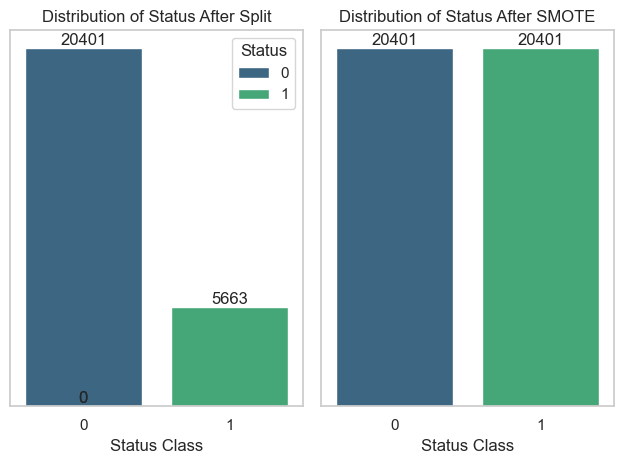

In [73]:
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x=y_train, hue=y_train, palette='viridis')
plt.title('Distribution of Status After Split')
plt.xlabel('Status Class')
plt.ylabel('Count')

# Add labels on top of the bars without decimals
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

# Remove y-axis values
ax1.yaxis.set_visible(False)

# Second subplot: Distribution of y_train_resampled
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x=y_train_resampled, hue=y_train_resampled, palette='viridis', legend=False)
plt.title('Distribution of Status After SMOTE')
plt.xlabel('Status Class')
plt.ylabel('Count')

# Add labels on top of the bars without decimals
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

# Remove y-axis values
ax2.yaxis.set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

## Training Data on SMOTE Data

In [74]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Making Predictions

In [75]:

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9071658738683444


## Classification Report

In [76]:
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Display the DataFrame
print("Classification Report:\n", report_df)

Classification Report:
               precision    recall  f1-score      support
0              0.923412  0.960371  0.941529  5072.000000
1              0.838164  0.720415  0.774842  1445.000000
accuracy       0.907166  0.907166  0.907166     0.907166
macro avg      0.880788  0.840393  0.858185  6517.000000
weighted avg   0.904510  0.907166  0.904570  6517.000000


## Confusion Matrix


Confusion matrix:
 [[4871  201]
 [ 404 1041]]


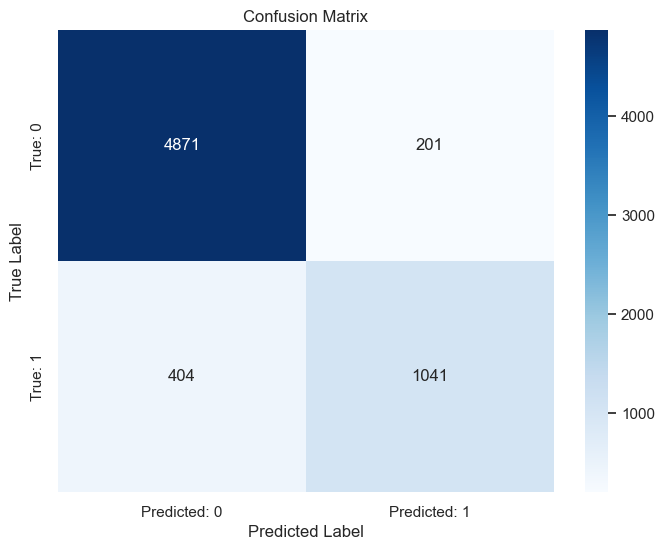

In [77]:
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(f'Confusion matrix:\n {cm}')

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['True: 0', 'True: 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Saving Model To Pickle to Help in Deployment

In [78]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)